## World Development Indicators - Analytics

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import Imputer
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer

datos = pd.read_csv("suramerica.csv").drop('Unnamed: 0', 1)
datos.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Antigua and Barbuda,ATG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,126.144000
1,Antigua and Barbuda,ATG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,88.237117
2,Antigua and Barbuda,ATG,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,7.779958
3,Antigua and Barbuda,ATG,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,80.457159
4,Antigua and Barbuda,ATG,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,32.920000


In [2]:
start_time = time.time()

paises = ['Antigua and Barbuda','Argentina','Aruba','Bahamas, The','Barbados','Belize','Bolivia','Brazil','Cayman Islands','Chile','Colombia','Costa Rica','Cuba','Curacao','Dominica','Dominican Republic','Ecuador','El Salvador','Grenada','Guatemala','Guyana','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Paraguay','Peru','Puerto Rico','Sint Maarten (Dutch part)','St. Kitts and Nevis','St. Lucia','St. Martin (French part)','St. Vincent and the Grenadines','Suriname','Trinidad and Tobago','Turks and Caicos Islands','Uruguay','Venezuela, RB','Virgin Islands (U.S.)']
indicators = ['GDP (constant LCU)','GDP (current LCU)','GDP (current US$)','GDP at market prices (constant 2010 US$)','GDP deflator (base year varies by country)','GDP growth (annual %)','GDP per capita (constant 2010 US$)','GDP per capita (constant LCU)','GDP per capita (current LCU)','GDP per capita (current US$)','GDP per capita growth (annual %)','GDP per capita, PPP (constant 2011 international $)','GDP per capita, PPP (current international $)','GDP, PPP (constant 2011 international $)','GDP, PPP (current international $)']
years = range(2008,2012+1)

tabla = pd.DataFrame.pivot_table(datos, values='Value', index=['CountryName', 'Year'], columns=['IndicatorName']).loc[(paises,years),indicators]

print("--- %s seconds ---" % (time.time() - start_time))

tabla

--- 1.71800017357 seconds ---


IndicatorName                  GDP (constant LCU)  GDP (current LCU)  \
CountryName              Year                                          
Antigua and Barbuda      2008        3.358406e+09       3.637845e+09   
                         2009        2.954188e+09       3.257308e+09   
                         2010        2.743171e+09       3.065955e+09   
                         2011        2.693974e+09       3.050780e+09   
                         2012        2.802259e+09       3.252725e+09   
Argentina                2008        7.058647e+11       1.283906e+12   
                         2009        7.062178e+11       1.411526e+12   
                         2010        7.729666e+11       1.810830e+12   
                         2011        8.377910e+11       2.312009e+12   
                         2012        8.445081e+11       2.765575e+12   
Aruba                    2008        3.293180e+09       4.997610e+09   
                         2009        3.107000e+09       4.473090e+09   
                         2010                 NaN       4.417190e+09   
                         2011                 NaN       4.626190e+09   
                         2012                 NaN                NaN   
Bahamas, The             2008        7.893019e+09       8.246650e+09   
                         2009        7.563465e+09       7.820420e+09   
                         2010        7.679850e+09       7.909580e+09   
                         2011        7.726920e+09       7.889750e+09   
                         2012        7.898250e+09       8.234470e+09   
Barbados                 2008        1.141000e+09       9.190000e+09   
                         2009        1.095000e+09       9.204000e+09   
                         2010        1.098000e+09       8.891000e+09   
                         2011        1.106000e+09       8.716000e+09   
                         2012        1.109000e+09       8.626000e+09   
Belize                   2008        2.353310e+09       2.737250e+09   
                         2009        2.370095e+09       2.673914e+09   
                         2010        2.448874e+09       2.794227e+09   
                         2011        2.500397e+09       2.974011e+09   
                         2012        2.596031e+09       3.147735e+09   
...                                           ...                ...   
Suriname                 2008        8.395000e+09       9.698000e+09   
                         2009        8.648000e+09       1.063800e+10   
                         2010        9.094000e+09       1.199300e+10   
                         2011        9.573000e+09       1.445200e+10   
                         2012        9.867000e+09       1.643400e+10   
Trinidad and Tobago      2008        9.292100e+10       1.752870e+11   
                         2009        8.884200e+10       1.212810e+11   
                         2010        8.875900e+10       1.341250e+11   
                         2011        8.876500e+10       1.564500e+11   
                         2012        8.997800e+10       1.580450e+11   
Turks and Caicos Islands 2008                 NaN                NaN   
                         2009                 NaN                NaN   
                         2010                 NaN                NaN   
                         2011                 NaN                NaN   
                         2012                 NaN                NaN   
Uruguay                  2008        5.052072e+11       6.361509e+11   
                         2009        5.266457e+11       7.145234e+11   
                         2010        5.677420e+11       8.080785e+11   
                         2011        5.970496e+11       9.263561e+11   
                         2012        6.168902e+11       1.043637e+12   
Venezuela, RB            2008        5.852507e+10       6.775936e+11   
                         2009        5.665092e+10       7.072625e+11   
                         2010        5.5

In [3]:
def splitter(tab,y_indicator):
    # Asignamos X e y, eliminando la columna y en X
    X = np.delete(tab[:,:], y_indicator, 1)
    y = tab[:,y_indicator]
    # Separamos Train y Test respectivamente para X e y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    return X_train, X_test, y_train, y_test

In [4]:
def r2(y_true, y_predict):
    return r2_score(y_true, y_predict)

In [5]:
def DTR(X_train, X_test, y_train, y_test):
    estimator = DecisionTreeRegressor()
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    R2_test = r2(y_test,y_predict)
    return R2_test, y_test , y_predict

In [6]:
def imputador(tab):
    impute=Imputer(missing_values="NaN",strategy='mean',axis=0)
    impute.fit(tab)
    tabla_imputada=impute.transform(tab)
    return tabla_imputada

In [8]:
def Grid_Search_CV(X_train, y_train):
    cv = ShuffleSplit(X_train.shape[0], n_iter = 10, test_size=0.2, random_state=0)
    estimator = DecisionTreeRegressor()
    params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'splitter': ['best', 'random']}

    grid = GridSearchCV(estimator, params, cv=cv, scoring="r2")

    grid.fit(X_train, y_train)
    
    for k,v in grid.best_params_.iteritems():
        best_max_depth = v
    
    return best_max_depth

In [9]:
def Grid_Search_CV_v11(X_train, y_train):
    cv = ShuffleSplit(X_train.shape[0], n_iter = 10, test_size=0.2, random_state=0)
    estimator = DecisionTreeRegressor()
    params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'splitter': ['best', 'random']}
    scoring_func = make_scorer(r2)
    
    grid = GridSearchCV(estimator, params, cv=cv, scoring=scoring_func)

    grid.fit(X_train, y_train)
    
    for k,v in grid.best_params_.iteritems():
        best_max_depth = v
    
    return best_max_depth

In [10]:
def trial(tab,y_indicator):
    X_train, X_test, y_train, y_test = splitter(tab,y_indicator)
    best_max_depth = Grid_Search_CV_v11(X_train, y_train)
    y_predict_optimunGrid = best_estimator.predict(X_test)
    print r2(y_test,y_predict_optimunGrid)
    return pd.DataFrame(zip(*[y_test,y_predict_optimunGrid]))

In [11]:
tabla_zeros = pd.DataFrame(tabla).fillna(value=0)
tabla_imputada = imputador(tabla)

In [12]:
pd.DataFrame(tabla_zeros)

IndicatorName                  GDP (constant LCU)  GDP (current LCU)  \
CountryName              Year                                          
Antigua and Barbuda      2008        3.358406e+09       3.637845e+09   
                         2009        2.954188e+09       3.257308e+09   
                         2010        2.743171e+09       3.065955e+09   
                         2011        2.693974e+09       3.050780e+09   
                         2012        2.802259e+09       3.252725e+09   
Argentina                2008        7.058647e+11       1.283906e+12   
                         2009        7.062178e+11       1.411526e+12   
                         2010        7.729666e+11       1.810830e+12   
                         2011        8.377910e+11       2.312009e+12   
                         2012        8.445081e+11       2.765575e+12   
Aruba                    2008        3.293180e+09       4.997610e+09   
                         2009        3.107000e+09       4.473090e+09   
                         2010        0.000000e+00       4.417190e+09   
                         2011        0.000000e+00       4.626190e+09   
                         2012        0.000000e+00       0.000000e+00   
Bahamas, The             2008        7.893019e+09       8.246650e+09   
                         2009        7.563465e+09       7.820420e+09   
                         2010        7.679850e+09       7.909580e+09   
                         2011        7.726920e+09       7.889750e+09   
                         2012        7.898250e+09       8.234470e+09   
Barbados                 2008        1.141000e+09       9.190000e+09   
                         2009        1.095000e+09       9.204000e+09   
                         2010        1.098000e+09       8.891000e+09   
                         2011        1.106000e+09       8.716000e+09   
                         2012        1.109000e+09       8.626000e+09   
Belize                   2008        2.353310e+09       2.737250e+09   
                         2009        2.370095e+09       2.673914e+09   
                         2010        2.448874e+09       2.794227e+09   
                         2011        2.500397e+09       2.974011e+09   
                         2012        2.596031e+09       3.147735e+09   
...                                           ...                ...   
Suriname                 2008        8.395000e+09       9.698000e+09   
                         2009        8.648000e+09       1.063800e+10   
                         2010        9.094000e+09       1.199300e+10   
                         2011        9.573000e+09       1.445200e+10   
                         2012        9.867000e+09       1.643400e+10   
Trinidad and Tobago      2008        9.292100e+10       1.752870e+11   
                         2009        8.884200e+10       1.212810e+11   
                         2010        8.875900e+10       1.341250e+11   
                         2011        8.876500e+10       1.564500e+11   
                         2012        8.997800e+10       1.580450e+11   
Turks and Caicos Islands 2008        0.000000e+00       0.000000e+00   
                         2009        0.000000e+00       0.000000e+00   
                         2010        0.000000e+00       0.000000e+00   
                         2011        0.000000e+00       0.000000e+00   
                         2012        0.000000e+00       0.000000e+00   
Uruguay                  2008        5.052072e+11       6.361509e+11   
                         2009        5.266457e+11       7.145234e+11   
                         2010        5.677420e+11       8.080785e+11   
                         2011        5.970496e+11       9.263561e+11   
                         2012        6.168902e+11       1.043637e+12   
Venezuela, RB            2008        5.852507e+10       6.775936e+11   
                         2009        5.665092e+10       7.072625e+11   
                         2010        5.5

## Eliminamos los indicadores que no tienen registros (Columnas en Zero)

In [13]:
tabla_zeros_2 = tabla_zeros.loc[:, (tabla_zeros != 0).any(axis=0)]
tabla_zeros_2

IndicatorName                  GDP (constant LCU)  GDP (current LCU)  \
CountryName              Year                                          
Antigua and Barbuda      2008        3.358406e+09       3.637845e+09   
                         2009        2.954188e+09       3.257308e+09   
                         2010        2.743171e+09       3.065955e+09   
                         2011        2.693974e+09       3.050780e+09   
                         2012        2.802259e+09       3.252725e+09   
Argentina                2008        7.058647e+11       1.283906e+12   
                         2009        7.062178e+11       1.411526e+12   
                         2010        7.729666e+11       1.810830e+12   
                         2011        8.377910e+11       2.312009e+12   
                         2012        8.445081e+11       2.765575e+12   
Aruba                    2008        3.293180e+09       4.997610e+09   
                         2009        3.107000e+09       4.473090e+09   
                         2010        0.000000e+00       4.417190e+09   
                         2011        0.000000e+00       4.626190e+09   
                         2012        0.000000e+00       0.000000e+00   
Bahamas, The             2008        7.893019e+09       8.246650e+09   
                         2009        7.563465e+09       7.820420e+09   
                         2010        7.679850e+09       7.909580e+09   
                         2011        7.726920e+09       7.889750e+09   
                         2012        7.898250e+09       8.234470e+09   
Barbados                 2008        1.141000e+09       9.190000e+09   
                         2009        1.095000e+09       9.204000e+09   
                         2010        1.098000e+09       8.891000e+09   
                         2011        1.106000e+09       8.716000e+09   
                         2012        1.109000e+09       8.626000e+09   
Belize                   2008        2.353310e+09       2.737250e+09   
                         2009        2.370095e+09       2.673914e+09   
                         2010        2.448874e+09       2.794227e+09   
                         2011        2.500397e+09       2.974011e+09   
                         2012        2.596031e+09       3.147735e+09   
...                                           ...                ...   
Suriname                 2008        8.395000e+09       9.698000e+09   
                         2009        8.648000e+09       1.063800e+10   
                         2010        9.094000e+09       1.199300e+10   
                         2011        9.573000e+09       1.445200e+10   
                         2012        9.867000e+09       1.643400e+10   
Trinidad and Tobago      2008        9.292100e+10       1.752870e+11   
                         2009        8.884200e+10       1.212810e+11   
                         2010        8.875900e+10       1.341250e+11   
                         2011        8.876500e+10       1.564500e+11   
                         2012        8.997800e+10       1.580450e+11   
Turks and Caicos Islands 2008        0.000000e+00       0.000000e+00   
                         2009        0.000000e+00       0.000000e+00   
                         2010        0.000000e+00       0.000000e+00   
                         2011        0.000000e+00       0.000000e+00   
                         2012        0.000000e+00       0.000000e+00   
Uruguay                  2008        5.052072e+11       6.361509e+11   
                         2009        5.266457e+11       7.145234e+11   
                         2010        5.677420e+11       8.080785e+11   
                         2011        5.970496e+11       9.263561e+11   
                         2012        6.168902e+11       1.043637e+12   
Venezuela, RB            2008        5.852507e+10       6.775936e+11   
                         2009        5.665092e+10       7.072625e+11   
                         2010        5.5

In [14]:
def DTR_v2(X_train, X_test, y_train, y_test, depth):
    estimator = DecisionTreeRegressor(max_depth=depth)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    R2_test = r2(y_test,y_predict)
    return R2_test

## Iteramos para todos los indicadores

In [15]:
R2_global = list()

for i in range(0,np.shape(tabla_imputada)[1]):
    ## Zeros
    X_train, X_test, y_train, y_test = splitter(np.array(tabla_zeros_2),i)
    best_max_depth = Grid_Search_CV(X_train, y_train)
    R2_Original_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test,best_max_depth)
    
    ## Imputado
    X_train, X_test, y_train, y_test = splitter(np.array(tabla_imputada),i)
    best_max_depth = Grid_Search_CV(X_train, y_train)
    R2_Imputado_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test,best_max_depth)
    
    # Recopilamos los R2
    R2_global.append([R2_Original_GridSearchCV,R2_Imputado_GridSearchCV])

pd.DataFrame(R2_global,columns=['Original','Imputado'])

,Original,Imputado
0,0.992848,0.999817
1,0.994595,0.995235
2,0.986291,0.245532
3,0.920351,0.924626
4,0.998133,0.997946
5,0.996389,0.961946
6,0.966528,0.497547
7,0.901652,0.956042
8,0.997661,0.919128
9,0.954477,0.996178


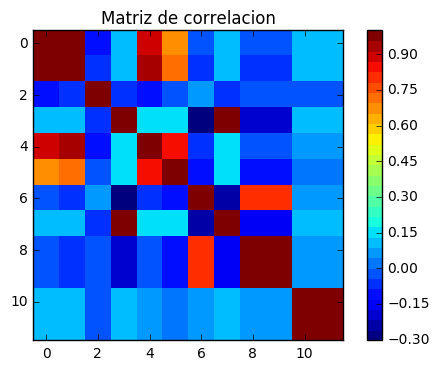

In [16]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    plt.title('Matriz de correlacion')
    fig.colorbar(cax)
    plt.show()

correlation_matrix(pd.DataFrame(tabla_imputada))

In [17]:
def correlacion(tab,y_indicator):
    # Buscamos los indicadores que se correlacionen más (coeficiente > 0.7)
    eliminar = []
    tabla_correlacion = np.array(pd.DataFrame(tab).corr())
    for i in range(np.shape(tab)[1]):
        if abs(tabla_correlacion[i,y_indicator]) > 0.7:
            eliminar.append(i)

    # Eliminamos los indicadores que se correlacionan más (Coeficiente > 0.7)
    temporal = tab[:,:]

    for i in range(len(eliminar)):
        temporal = np.delete(temporal[:,:], eliminar[i]-i, 1)

    return temporal

In [18]:
def splitter_v2(tab,y_indicator):
    # Asignamos X e y, eliminando los indicadores que se correlacionen más (coeficiente > 0.7)
    X = correlacion(tab,y_indicator)
    y = tab[:,y_indicator]
    
    # Separamos Train y Test respectivamente para X e y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    return X_train, X_test, y_train, y_test

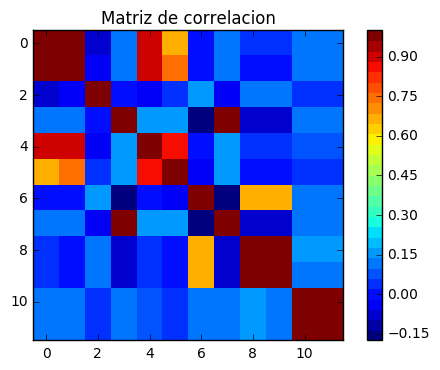

In [19]:
correlation_matrix(pd.DataFrame(tabla_zeros_2))

## Iteramos el Splitter v2

In [24]:
R2_global = list()

for i in range(0,np.shape(tabla_imputada)[1]):
    ## Zeros
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_zeros_2),i)
    best_max_depth = Grid_Search_CV(X_train, y_train)
    R2_Original_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test,best_max_depth)
    
    ## Imputado
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_imputada),i)
    best_max_depth = Grid_Search_CV(X_train, y_train)
    R2_Imputado_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test,best_max_depth)
    
    # Recopilamos los R2
    R2_global.append([R2_Original_GridSearchCV,R2_Imputado_GridSearchCV])

pd.DataFrame(R2_global,columns=['Original','Imputado'])

,Original,Imputado
0,0.998538,0.997505
1,0.214548,0.988657
2,0.789133,0.790600
3,0.137466,0.028468
4,-1.497420,0.643365
5,0.995219,0.994105
6,0.636951,-0.458638
7,-0.262360,-0.163688
8,0.933658,0.412875
9,0.897024,0.893996


In [23]:
R2_global = list()

for i in range(0,np.shape(tabla_imputada)[1]):
    ## Zeros
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_zeros_2),i)
    best_max_depth = Grid_Search_CV_v11(X_train, y_train)
    R2_Original_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test,best_max_depth)
    
    ## Imputado
    X_train, X_test, y_train, y_test = splitter_v2(np.array(tabla_imputada),i)
    best_max_depth = Grid_Search_CV_v11(X_train, y_train)
    R2_Imputado_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test,best_max_depth)
    
    # Recopilamos los R2
    R2_global.append([R2_Original_GridSearchCV,R2_Imputado_GridSearchCV])

pd.DataFrame(R2_global,columns=['Original','Imputado'])

,Original,Imputado
0,0.508121,0.997168
1,0.975440,0.969097
2,0.960492,0.976602
3,0.258507,0.090765
4,0.994362,0.899301
5,0.991853,0.980412
6,0.409070,0.864649
7,0.037570,-0.035026
8,0.919489,0.659940
9,0.836107,0.122615


## Iteramos individualmente el nuevo Splitter v2

In [25]:
def iter_R2(tab,iteraciones):
    
    temporal = []
    iter_R2_Global_GridSearchCV = []
    
    for k in range(np.shape(tab)[1]):
        for i in range(iteraciones):
            ## Valores Originales
            X_train, X_test, y_train, y_test = splitter_v2(np.array(tab),k)
            best_max_depth = Grid_Search_CV_v11(X_train, y_train)
            R2_Original_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test, best_max_depth)    
            temporal.append(R2_Original_GridSearchCV)
        iter_R2_Global_GridSearchCV.append(temporal)
        temporal = []
        
    return iter_R2_Global_GridSearchCV

#### Media de las Iteraciones R2 para cada indicador en cada caso

In [26]:
def iter_mean(iter_score):
    temporal = []
    temporal = np.array(iter_score)
    mean_score = []

    for k in range(np.shape(tabla_zeros_2)[1]):
        mean_score.append(np.mean(temporal[k,:]))
        
    return mean_score

## GridSearch v11

In [27]:
pd.DataFrame(np.column_stack((iter_mean(iter_R2(tabla_zeros_2,5)),iter_mean(iter_R2(tabla_imputada,5)))),columns=['Original','Imputando'])

,Original,Imputando
0,0.998260,0.994867
1,-16.476804,-3.823903
2,0.793024,0.846275
3,0.238157,0.119578
4,-0.587005,-1.197074
5,0.976181,0.974907
6,0.544253,0.724648
7,0.216586,0.139236
8,0.923839,0.659475
9,0.431497,0.607008


## AQUI VOY

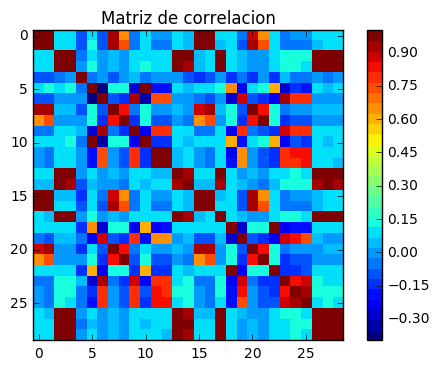

In [81]:
correlation_matrix(pd.DataFrame(tabla_3_imputada))

In [92]:
pd.DataFrame(tabla_3_imputada).head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,3.358406e+09,3.637845e+09,1.239080e+09,1.347350e+09,108.320559,0.071111,14517.635341,39348.639719,42622.666667,15786.172840,...,5929.149346,746856.969226,40690.305800,1.462069,14990.0,12330.943000,23600.0,1.279635e+09,2.727222e+11,2.014452e+09
1,2.954188e+09,3.257308e+09,1.089944e+09,1.206410e+09,110.260684,-12.036015,12629.713786,34231.611819,37744.009270,13979.262693,...,5929.149346,746856.969226,36154.034762,1.462069,13420.0,12330.943000,20760.0,1.158097e+09,2.727222e+11,1.791455e+09
2,2.743171e+09,3.065955e+09,1.012090e+09,1.135539e+09,111.766847,-7.142991,11602.142227,31446.478970,35146.738046,13017.310387,...,5929.149346,746856.969226,34172.090837,1.462069,12620.0,12330.943000,19590.0,1.100878e+09,2.727222e+11,1.709112e+09
3,2.693974e+09,3.050780e+09,9.939385e+08,1.129918e+09,113.244595,-1.793436,11275.280156,30560.551094,34608.172248,12817.841573,...,5929.149346,746856.969226,33399.218396,1.462069,12370.0,19289.693741,19290.0,1.090011e+09,1.700425e+09,1.700425e+09
4,2.802259e+09,3.252725e+09,1.033890e+09,1.204713e+09,116.075112,4.019542,11607.745344,31461.665675,36519.163794,13525.616220,...,5929.149346,746856.969226,34970.446508,1.462069,12850.0,12330.943000,20060.0,1.144530e+09,2.727222e+11,1.786580e+09


In [122]:
pd.DataFrame(np.array(pd.DataFrame(tabla_3_imputada).corr())[:,14])

,0
0,0.050954
1,0.037705
2,0.968227
3,0.929578
4,-0.108726
5,0.031861
6,0.014028
7,0.002698
8,-0.060089
9,0.084611


In [95]:
pd.DataFrame((correlacion(tabla_3_imputada,15))).head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.239080e+09,1.347350e+09,108.320559,0.071111,14517.635341,42622.666667,15786.172840,-1.046262,25735.714754,24723.111892,...,2.619846,5929.149346,40690.305800,1.462069,14990.0,12330.943000,23600.0,1.279635e+09,2.727222e+11,2.014452e+09
1,1.089944e+09,1.206410e+09,110.260684,-12.036015,12629.713786,37744.009270,13979.262693,-13.004332,22388.956865,21671.375749,...,2.619846,5929.149346,36154.034762,1.462069,13420.0,12330.943000,20760.0,1.158097e+09,2.727222e+11,1.791455e+09
2,1.012090e+09,1.135539e+09,111.766847,-7.142991,11602.142227,35146.738046,13017.310387,-8.136143,20567.359344,20151.309866,...,2.619846,5929.149346,34172.090837,1.462069,12620.0,12330.943000,19590.0,1.100878e+09,2.727222e+11,1.709112e+09
3,9.939385e+08,1.129918e+09,113.244595,-1.793436,11275.280156,34608.172248,12817.841573,-2.817256,19987.924139,19987.924139,...,2.619846,5929.149346,33399.218396,1.462069,12370.0,19289.693741,19290.0,1.090011e+09,1.700425e+09,1.700425e+09
4,1.033890e+09,1.204713e+09,116.075112,4.019542,11607.745344,36519.163794,13525.616220,2.948620,20577.292107,20946.700835,...,2.619846,5929.149346,34970.446508,1.462069,12850.0,12330.943000,20060.0,1.144530e+09,2.727222e+11,1.786580e+09


In [28]:
def splitter_v3(tabla_1,tabla_2,y_indicator):
    from sklearn.model_selection import train_test_split   
    # Asignamos X e y, eliminando los indicadores que se correlacionen más (coeficiente > 0.7)
    
    tab_fusion = np.column_stack((tabla_1[:,:],tabla_2[:,y_indicator]))
    
    #X = correlacion(tab_1,y_indicator)
    #y = tab[:,y_indicator]
    
    # Separamos Train y Test respectivamente para X e y
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    return tab_fusion #X_train, X_test, y_train, y_test

In [ ]:
splitter_v3(educacion,economia,0)

In [124]:
X = correlacion(tabla_3_imputada[:,:np.shape(tabla)[1]+1],-1)
y = tabla_3_imputada[:,14]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

estimator = DecisionTreeRegressor()
estimator.fit(X_train,y_train)
y_predict = estimator.predict(X_test)
R2_test = r2(y_test,y_predict)

print R2_test

pd.DataFrame((zip(*[y_test,y_predict])), columns=['Test','Predict']).head()

0.998646835337


,Test,Predict
0,1.320185e+11,1.320185e+11
1,1.320185e+11,1.320185e+11
2,1.320185e+11,1.320185e+11
3,1.136109e+10,1.165415e+10
4,5.492087e+10,5.192688e+10


In [112]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10
0,3.358406e+09,3.637845e+09,108.320559,0.071111,14517.635341,39348.639719,42622.666667,15786.172840,-1.046262,25735.714754,24723.111892
1,2.954188e+09,3.257308e+09,110.260684,-12.036015,12629.713786,34231.611819,37744.009270,13979.262693,-13.004332,22388.956865,21671.375749
2,2.743171e+09,3.065955e+09,111.766847,-7.142991,11602.142227,31446.478970,35146.738046,13017.310387,-8.136143,20567.359344,20151.309866
3,2.693974e+09,3.050780e+09,113.244595,-1.793436,11275.280156,30560.551094,34608.172248,12817.841573,-2.817256,19987.924139,19987.924139
4,2.802259e+09,3.252725e+09,116.075112,4.019542,11607.745344,31461.665675,36519.163794,13525.616220,2.948620,20577.292107,20946.700835


In [121]:
pd.DataFrame(tabla_3_imputada[:,:np.shape(tabla)[1]+1]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,3.358406e+09,3.637845e+09,1.239080e+09,1.347350e+09,108.320559,0.071111,14517.635341,39348.639719,42622.666667,15786.172840,-1.046262,25735.714754,24723.111892,2.196543e+09,1.320185e+11
1,2.954188e+09,3.257308e+09,1.089944e+09,1.206410e+09,110.260684,-12.036015,12629.713786,34231.611819,37744.009270,13979.262693,-13.004332,22388.956865,21671.375749,1.932167e+09,1.320185e+11
2,2.743171e+09,3.065955e+09,1.012090e+09,1.135539e+09,111.766847,-7.142991,11602.142227,31446.478970,35146.738046,13017.310387,-8.136143,20567.359344,20151.309866,1.794152e+09,1.320185e+11
3,2.693974e+09,3.050780e+09,9.939385e+08,1.129918e+09,113.244595,-1.793436,11275.280156,30560.551094,34608.172248,12817.841573,-2.817256,19987.924139,19987.924139,1.761975e+09,1.320185e+11
4,2.802259e+09,3.252725e+09,1.033890e+09,1.204713e+09,116.075112,4.019542,11607.745344,31461.665675,36519.163794,13525.616220,2.948620,20577.292107,20946.700835,1.832799e+09,1.320185e+11


In [115]:
pd.DataFrame(y).head()

,0
0,2.126183e+13
1,2.126183e+13
2,2.126183e+13
3,2.126183e+13
4,2.126183e+13


In [119]:
pd.DataFrame(tabla_3_imputada[:,14]).head()

,0
0,1.320185e+11
1,1.320185e+11
2,1.320185e+11
3,1.320185e+11
4,1.320185e+11


In [139]:
pd.DataFrame(tabla_3_imputada[:,:np.shape(tabla)[1]+1]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,3.358406e+09,3.637845e+09,1.239080e+09,1.347350e+09,108.320559,0.071111,14517.635341,39348.639719,42622.666667,15786.172840,-1.046262,25735.714754,24723.111892,2.196543e+09,1.320185e+11
1,2.954188e+09,3.257308e+09,1.089944e+09,1.206410e+09,110.260684,-12.036015,12629.713786,34231.611819,37744.009270,13979.262693,-13.004332,22388.956865,21671.375749,1.932167e+09,1.320185e+11
2,2.743171e+09,3.065955e+09,1.012090e+09,1.135539e+09,111.766847,-7.142991,11602.142227,31446.478970,35146.738046,13017.310387,-8.136143,20567.359344,20151.309866,1.794152e+09,1.320185e+11
3,2.693974e+09,3.050780e+09,9.939385e+08,1.129918e+09,113.244595,-1.793436,11275.280156,30560.551094,34608.172248,12817.841573,-2.817256,19987.924139,19987.924139,1.761975e+09,1.320185e+11
4,2.802259e+09,3.252725e+09,1.033890e+09,1.204713e+09,116.075112,4.019542,11607.745344,31461.665675,36519.163794,13525.616220,2.948620,20577.292107,20946.700835,1.832799e+09,1.320185e+11


In [137]:
X_1 = correlacion(tabla_3_imputada[:,:np.shape(tabla)[1]+1],12)
pd.DataFrame(X_1).head()

,0,1,2,3,4,5,6,7,8,9,10
0,3.358406e+09,3.637845e+09,1.239080e+09,1.347350e+09,108.320559,0.071111,39348.639719,42622.666667,-1.046262,2.196543e+09,1.320185e+11
1,2.954188e+09,3.257308e+09,1.089944e+09,1.206410e+09,110.260684,-12.036015,34231.611819,37744.009270,-13.004332,1.932167e+09,1.320185e+11
2,2.743171e+09,3.065955e+09,1.012090e+09,1.135539e+09,111.766847,-7.142991,31446.478970,35146.738046,-8.136143,1.794152e+09,1.320185e+11
3,2.693974e+09,3.050780e+09,9.939385e+08,1.129918e+09,113.244595,-1.793436,30560.551094,34608.172248,-2.817256,1.761975e+09,1.320185e+11
4,2.802259e+09,3.252725e+09,1.033890e+09,1.204713e+09,116.075112,4.019542,31461.665675,36519.163794,2.948620,1.832799e+09,1.320185e+11


In [138]:
X_2 = correlacion(tabla_3_imputada[:,:np.shape(tabla)[1]+1],-1)
pd.DataFrame(X_2).head()

,0,1,2,3,4,5,6,7,8,9,10
0,3.358406e+09,3.637845e+09,108.320559,0.071111,14517.635341,39348.639719,42622.666667,15786.172840,-1.046262,25735.714754,24723.111892
1,2.954188e+09,3.257308e+09,110.260684,-12.036015,12629.713786,34231.611819,37744.009270,13979.262693,-13.004332,22388.956865,21671.375749
2,2.743171e+09,3.065955e+09,111.766847,-7.142991,11602.142227,31446.478970,35146.738046,13017.310387,-8.136143,20567.359344,20151.309866
3,2.693974e+09,3.050780e+09,113.244595,-1.793436,11275.280156,30560.551094,34608.172248,12817.841573,-2.817256,19987.924139,19987.924139
4,2.802259e+09,3.252725e+09,116.075112,4.019542,11607.745344,31461.665675,36519.163794,13525.616220,2.948620,20577.292107,20946.700835


In [149]:
pd.DataFrame(np.column_stack((tabla_3_imputada[:,:np.shape(tabla)[1]],tabla_3_imputada[:,15]))).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,3.358406e+09,3.637845e+09,1.239080e+09,1.347350e+09,108.320559,0.071111,14517.635341,39348.639719,42622.666667,15786.172840,-1.046262,25735.714754,24723.111892,2.196543e+09,2.126183e+13
1,2.954188e+09,3.257308e+09,1.089944e+09,1.206410e+09,110.260684,-12.036015,12629.713786,34231.611819,37744.009270,13979.262693,-13.004332,22388.956865,21671.375749,1.932167e+09,2.126183e+13
2,2.743171e+09,3.065955e+09,1.012090e+09,1.135539e+09,111.766847,-7.142991,11602.142227,31446.478970,35146.738046,13017.310387,-8.136143,20567.359344,20151.309866,1.794152e+09,2.126183e+13
3,2.693974e+09,3.050780e+09,9.939385e+08,1.129918e+09,113.244595,-1.793436,11275.280156,30560.551094,34608.172248,12817.841573,-2.817256,19987.924139,19987.924139,1.761975e+09,2.126183e+13
4,2.802259e+09,3.252725e+09,1.033890e+09,1.204713e+09,116.075112,4.019542,11607.745344,31461.665675,36519.163794,13525.616220,2.948620,20577.292107,20946.700835,1.832799e+09,2.126183e+13


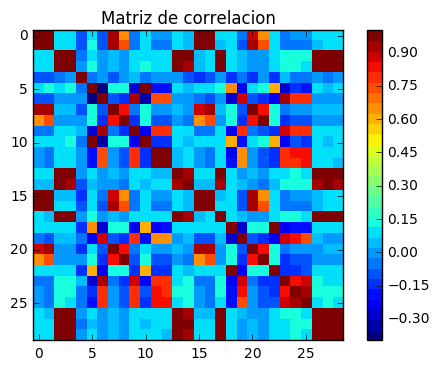

In [151]:
correlation_matrix(pd.DataFrame(tabla_3_imputada))

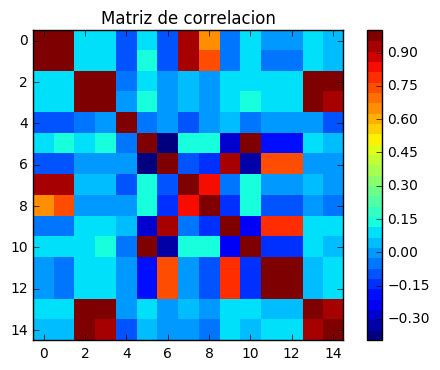

In [140]:
correlation_matrix(pd.DataFrame(tabla_3_imputada[:,:np.shape(tabla)[1]+1]))

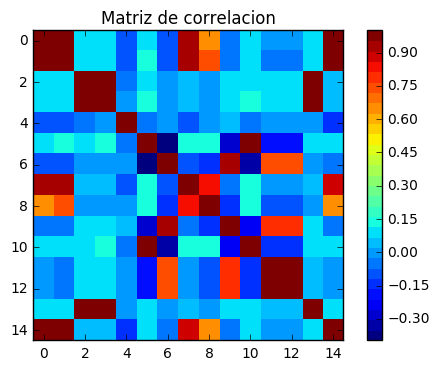

In [150]:
correlation_matrix(pd.DataFrame(np.column_stack((tabla_3_imputada[:,:np.shape(tabla)[1]],tabla_3_imputada[:,15]))))

In [152]:
X = correlacion(np.column_stack((tabla_3_imputada[:,:np.shape(tabla)[1]],tabla_3_imputada[:,15])),-1)
y = tabla_3_imputada[:,15]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

estimator = DecisionTreeRegressor()
estimator.fit(X_train,y_train)
y_predict = estimator.predict(X_test)
R2_test = r2(y_test,y_predict)

print R2_test

pd.DataFrame((zip(*[y_test,y_predict])), columns=['Test','Predict']).head()

0.995657290939


,Test,Predict
0,7.518630e+09,7.465858e+09
1,2.126183e+13,2.126183e+13
2,2.136692e+12,2.004773e+12
3,1.299263e+13,1.253667e+13
4,1.338441e+11,1.400292e+11
